In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/churn_prediction_simple.csv')

In [3]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [4]:
data['churn'].value_counts()/len(data)

0    0.806317
1    0.193683
Name: churn, dtype: float64

In [5]:
x = data.drop(columns = ['churn','customer_id'])
y = data['churn']

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)

In [7]:
# scaling the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_x,y, test_size = 0.2, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

In [8]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced') # the majority of the error in the model is due to class 0, so majority of the time goes on minimizing error in class 0 and ignore class 1 because of fewer instances of it.

In [9]:
classifier.fit(x_train,y_train)
predicted_values = classifier.predict(x_test)
predicted_probabilities = classifier.predict_proba(x_test)

In [10]:
predicted_values

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
predicted_probabilities

array([[0.62669819, 0.37330181],
       [0.52181098, 0.47818902],
       [0.67931495, 0.32068505],
       ...,
       [0.50921883, 0.49078117],
       [0.55035051, 0.44964949],
       [0.50917204, 0.49082796]])

EVALUATION MATRICES

In [12]:
classifier.score(x_test, y_test)

0.7188491164476665

In [13]:
# precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, predicted_values)
precision

0.35785288270377735

In [14]:
# recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, predicted_values)
recall

0.6650246305418719

In [15]:
f1 = 2/ ( (1/precision)+(1/recall))
f1

0.46531667384747954

In [16]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predicted_values)
f1 # our f1 score is less than 0.5 and thus our model at this step is far less than good.

0.4653166738474795

In [17]:
# calculating precision, recall, f1-score and support at once
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision, recall, f1_score, support = PRF_summary(y_test, predicted_values)
precision, recall, f1_score, support

(array([0.90636833, 0.35785288]),
 array([0.73098279, 0.66502463]),
 array([0.80928231, 0.46531667]),
 array([3602,  812]))

In [18]:
from sklearn.metrics import classification_report
k = classification_report(y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      3602
           1       0.36      0.67      0.47       812

    accuracy                           0.72      4414
   macro avg       0.63      0.70      0.64      4414
weighted avg       0.81      0.72      0.75      4414



In [20]:
# gathering precision recall threshold for different values
from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(y_test,predicted_probabilities[:,-1])
precision_points.shape, recall_points.shape, threshold_points.shape

((4415,), (4415,), (4414,))

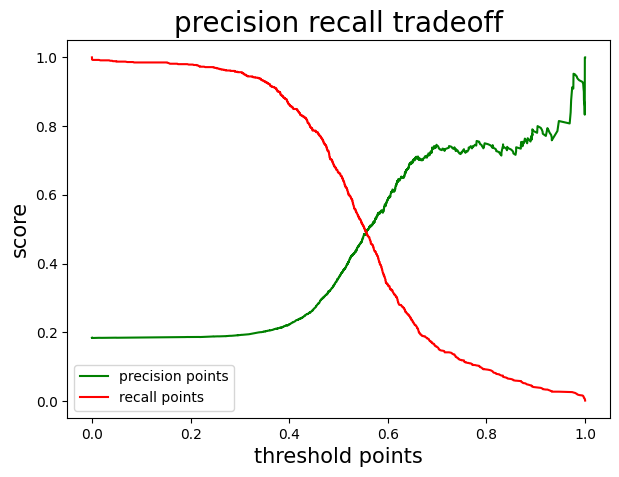

In [22]:
# plotting the graph
plt.figure(figsize=(7,5), dpi = 100)
plt.plot(threshold_points, precision_points[:-1], color='green', label='precision points')
plt.plot(threshold_points, recall_points[:-1], color='red', label='recall points')
plt.xlabel('threshold points', fontsize = 15)
plt.ylabel('score', fontsize = 15)
plt.title('precision recall tradeoff', fontsize = 20)
plt.legend()

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, predicted_probabilities[:,1])

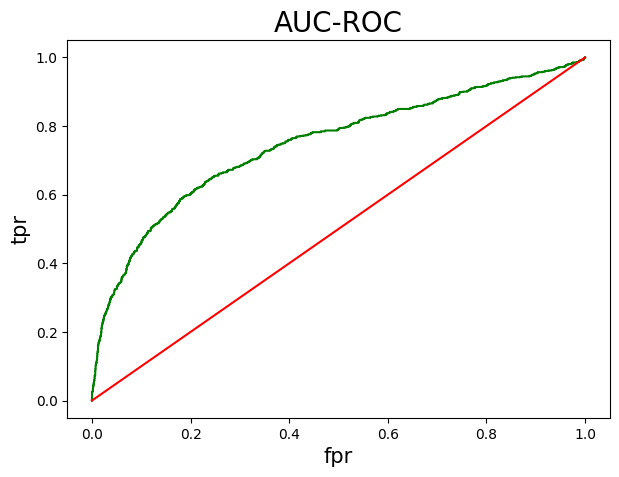

0.7471960706011713

In [24]:
plt.figure(figsize=(7,5), dpi=100)
plt.plot(fpr, tpr, color='green')
plt.plot([0,1],[0,1], color='red', label = 'baseline')
plt.xlabel('fpr', fontsize=15)
plt.ylabel('tpr', fontsize=15)
plt.title('AUC-ROC', fontsize=20)
plt.show()
roc_auc_score(y_test,predicted_probabilities[:,1])

In [25]:
classifier.coef_

array([[-0.1899424 , -0.06859252, -0.03999939,  0.05517073, -0.09035618,
         0.00406366,  0.03529393,  0.01880313, -0.157543  , -2.83204468,
        -0.38077944,  2.94258704, -0.17932935, -0.55856082, -0.0482673 ,
         0.75108134,  0.24114982,  0.29255737, -0.30785204]])

In [26]:
# coefficient plot
# this will tell us on which independent varibale is relying too more for prediction.
# arranging the data
c = classifier.coef_.reshape(-1)
X = x.columns
coeff_plot = pd.DataFrame(
    {
        'coefficients':c,
     'variables': X
    }
)
# sorting the values
coeff_plot = coeff_plot.sort_values(by = 'coefficients')
coeff_plot.head

<bound method NDFrame.head of     coefficients                       variables
9      -2.832045                 current_balance
13     -0.558561            current_month_credit
10     -0.380779      previous_month_end_balance
18     -0.307852          previous_month_balance
0      -0.189942                         vintage
12     -0.179329  average_monthly_balance_prevQ2
8      -0.157543     days_since_last_transaction
4      -0.090356                      occupation
1      -0.068593                             age
14     -0.048267           previous_month_credit
2      -0.039999                          gender
5       0.004064                            city
7       0.018803                     branch_code
6       0.035294            customer_nw_category
3       0.055171                      dependents
16      0.241150            previous_month_debit
17      0.292557           current_month_balance
15      0.751081             current_month_debit
11      2.942587   average_monthly_bala

Text(0.5, 1.0, 'coefficient plot')

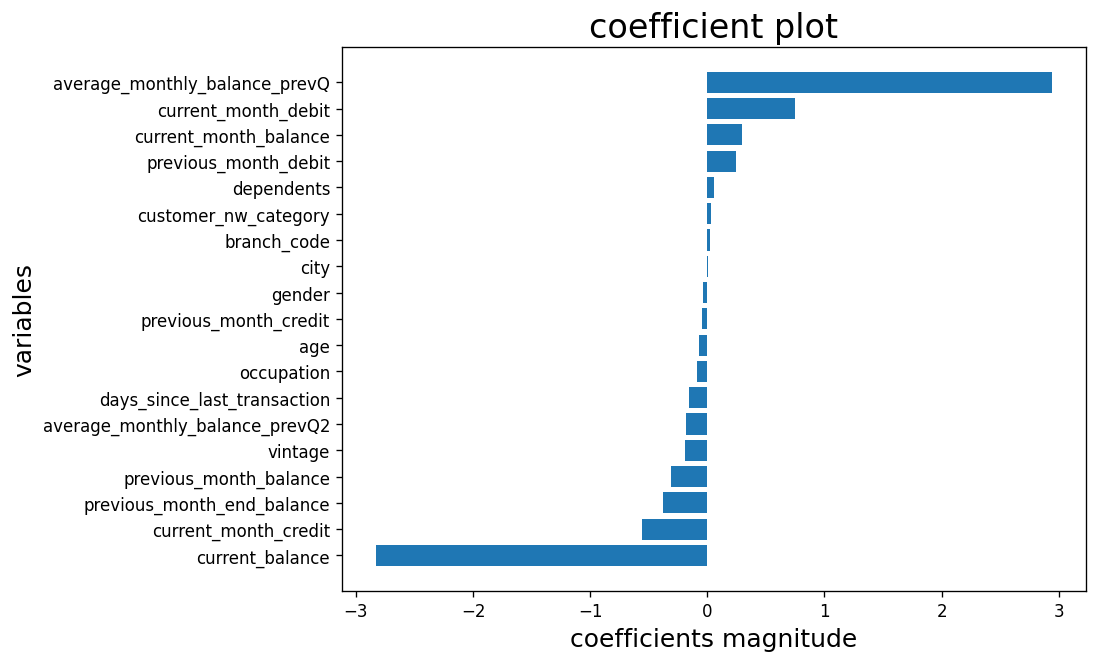

In [27]:
plt.figure(figsize=(8,6), dpi=120)
plt.barh(coeff_plot['variables'], coeff_plot['coefficients'])
plt.xlabel('coefficients magnitude', fontsize=15)
plt.ylabel('variables', fontsize=15)
plt.title('coefficient plot', fontsize=20)